**Melakukan Import Library yang dibutuhkan untuk projek**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from tqdm import tqdm
import warnings

plt.style.use("fivethirtyeight")
warnings.filterwarnings("ignore")

# Data Understanding

**Meinput dataset yang dibutuhkan seperti data rating, movies, keywords, dan credit. Serta menampilkan ukuran dari data tersebut**

In [ ]:
rating = pd.read_csv('C:/Users/ASUS/Downloads/ratings.csv')
movies = pd.read_csv('C:/Users/ASUS/Downloads/movies_metadata.csv')
keywords = pd.read_csv('C:/Users/ASUS/Downloads/keywords.csv')
credits = pd.read_csv('C:/Users/ASUS/Downloads/credits.csv')

print('Rating shape:', rating.shape)
print('Movies shape:', movies.shape)
print('Keywords shape:', keywords.shape)
print('Credits shape:', credits.shape)

Rating shape: (26024289, 4)
Movies shape: (45466, 24)
Keywords shape: (46419, 2)
Credits shape: (45476, 3)


Menampilkan 5 data teratas dari Rating

In [ ]:
rating.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


Menampilkan 5 data teratas dari Movie

In [ ]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


Menampilkan 5 data teratas dari Keywords

In [ ]:
keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


Menampilkan 5 data teratas dari Credits

In [ ]:
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


Menampilkan seluruh varibel yang dimiliki oleh data movie karena data utama yang akan digunakan adalah data movie

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

Menampilkan persebaran dari data movie

In [ ]:
movies.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


Mengambil data movie yang memiliki total voting lebih besar dari 110

In [ ]:
movies_md = movies[movies['vote_count'] >= 110]

In [ ]:
movies_md.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0


In [ ]:
movies_md.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

# Data Preparation

Hanya mengambil beberapa variabel dari data movie

In [ ]:
movies_md = movies_md[['id', 'original_title', 'overview', 'genres', 'release_date', 'runtime']]

In [ ]:
movies_md.head()

,id,original_title,overview,genres,release_date,runtime
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",1995-10-30,81.0
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",1995-12-15,104.0
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,"[{'id': 35, 'name': 'Comedy'}]",1995-02-10,106.0
5,949,Heat,"Obsessive master thief, Neil McCauley leads a ...","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",1995-12-15,170.0
6,11860,Sabrina,An ugly duckling having undergone a remarkable...,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",1995-12-15,127.0


In [ ]:
movies_md.reset_index(inplace=True, drop=True)

In [ ]:
movies_md.head()

,id,original_title,overview,genres,release_date,runtime
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",1995-10-30,81.0
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",1995-12-15,104.0
2,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,"[{'id': 35, 'name': 'Comedy'}]",1995-02-10,106.0
3,949,Heat,"Obsessive master thief, Neil McCauley leads a ...","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",1995-12-15,170.0
4,11860,Sabrina,An ugly duckling having undergone a remarkable...,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",1995-12-15,127.0


Hanya mengambil varial id dan cast dari dataset credits

In [ ]:
movies_credits = credits[['id', 'cast']]

In [ ]:
movies_credits.head()

,id,cast
0,862,"[{'cast_id': 14, 'character': 'Woody (voice)',..."
1,8844,"[{'cast_id': 1, 'character': 'Alan Parrish', '..."
2,15602,"[{'cast_id': 2, 'character': 'Max Goldman', 'c..."
3,31357,"[{'cast_id': 1, 'character': ""Savannah 'Vannah..."
4,11862,"[{'cast_id': 1, 'character': 'George Banks', '..."


Hanya mengambil varibael movieId dan rating dari dataset rating

In [ ]:
movies_rating = rating[['movieId', 'rating']]
movies_rating.columns = ['id', 'rating']

In [ ]:
movies_rating.head()

,id,rating
0,110,1.0
1,147,4.5
2,858,5.0
3,1221,5.0
4,1246,5.0


In [ ]:
movies_md['id'] = movies_md['id'].astype(int)

Melakukan penggabungan datset antara data movie dan data keyword

In [ ]:
movies_df = pd.merge(movies_md, keywords, on='id', how='left')

In [ ]:
movies_df.head()

,id,original_title,overview,genres,release_date,runtime,keywords
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",1995-10-30,81.0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",1995-12-15,104.0,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,"[{'id': 35, 'name': 'Comedy'}]",1995-02-10,106.0,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
3,949,Heat,"Obsessive master thief, Neil McCauley leads a ...","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",1995-12-15,170.0,"[{'id': 642, 'name': 'robbery'}, {'id': 703, '..."
4,11860,Sabrina,An ugly duckling having undergone a remarkable...,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",1995-12-15,127.0,"[{'id': 90, 'name': 'paris'}, {'id': 380, 'nam..."


In [ ]:
movies_df.reset_index(inplace=True, drop=True)

Melakukan penggabungan datset antara data movie dan data rating

In [ ]:
movies_df = pd.merge(movies_df, movies_credits, on='id', how='left')
movies_df.reset_index(inplace=True, drop=True)

In [ ]:
movies_df.head()

,id,original_title,overview,genres,release_date,runtime,keywords,cast
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",1995-10-30,81.0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[{'cast_id': 14, 'character': 'Woody (voice)',..."
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",1995-12-15,104.0,"[{'id': 10090, 'name': 'board game'}, {'id': 1...","[{'cast_id': 1, 'character': 'Alan Parrish', '..."
2,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,"[{'id': 35, 'name': 'Comedy'}]",1995-02-10,106.0,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...","[{'cast_id': 1, 'character': 'George Banks', '..."
3,949,Heat,"Obsessive master thief, Neil McCauley leads a ...","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",1995-12-15,170.0,"[{'id': 642, 'name': 'robbery'}, {'id': 703, '...","[{'cast_id': 25, 'character': 'Lt. Vincent Han..."
4,11860,Sabrina,An ugly duckling having undergone a remarkable...,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",1995-12-15,127.0,"[{'id': 90, 'name': 'paris'}, {'id': 380, 'nam...","[{'cast_id': 1, 'character': 'Linus Larrabee',..."


Mengambil data hanya data genre dari variabel genres, Karena variabel genres masil memiliki berbagai data didalamnya

In [ ]:
movies_df['genre'] = movies_df['genres'].apply(lambda x: [i['name'] for i in eval(x)])

movies_df.head()

,id,original_title,overview,genres,release_date,runtime,keywords,cast,genre
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",1995-10-30,81.0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[Animation, Comedy, Family]"
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",1995-12-15,104.0,"[{'id': 10090, 'name': 'board game'}, {'id': 1...","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[Adventure, Fantasy, Family]"
2,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,"[{'id': 35, 'name': 'Comedy'}]",1995-02-10,106.0,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...","[{'cast_id': 1, 'character': 'George Banks', '...",[Comedy]
3,949,Heat,"Obsessive master thief, Neil McCauley leads a ...","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",1995-12-15,170.0,"[{'id': 642, 'name': 'robbery'}, {'id': 703, '...","[{'cast_id': 25, 'character': 'Lt. Vincent Han...","[Action, Crime, Drama, Thriller]"
4,11860,Sabrina,An ugly duckling having undergone a remarkable...,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",1995-12-15,127.0,"[{'id': 90, 'name': 'paris'}, {'id': 380, 'nam...","[{'cast_id': 1, 'character': 'Linus Larrabee',...","[Comedy, Romance]"


In [ ]:
movies_df['genre'] = movies_df['genre'].apply(lambda x: [i.replace(" ", "") for i in x])

movies_df.head()

,id,original_title,overview,genres,release_date,runtime,keywords,cast,genre
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",1995-10-30,81.0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[Animation, Comedy, Family]"
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",1995-12-15,104.0,"[{'id': 10090, 'name': 'board game'}, {'id': 1...","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[Adventure, Fantasy, Family]"
2,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,"[{'id': 35, 'name': 'Comedy'}]",1995-02-10,106.0,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...","[{'cast_id': 1, 'character': 'George Banks', '...",[Comedy]
3,949,Heat,"Obsessive master thief, Neil McCauley leads a ...","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",1995-12-15,170.0,"[{'id': 642, 'name': 'robbery'}, {'id': 703, '...","[{'cast_id': 25, 'character': 'Lt. Vincent Han...","[Action, Crime, Drama, Thriller]"
4,11860,Sabrina,An ugly duckling having undergone a remarkable...,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",1995-12-15,127.0,"[{'id': 90, 'name': 'paris'}, {'id': 380, 'nam...","[{'cast_id': 1, 'character': 'Linus Larrabee',...","[Comedy, Romance]"


Mengecek apakah ada data null

In [ ]:
movies_df.isnull().sum()

id                 0
original_title     0
overview          12
genres             0
release_date       0
runtime            0
keywords           0
cast               0
genre              0
dtype: int64

In [ ]:
movies_df['keywords'].fillna('[]', inplace=True)

In [ ]:
movies_df['genre'] = movies_df['genre'].apply(lambda x: ', '.join(x))

In [ ]:
# movies_df['genre'] = movies_df['genre'].apply(lambda x: ' '.join(x))

Menghapus kolom genres karena sudah tidak digunakan lagi. Sudah diganti oleh kolom genre

In [ ]:
movies_df.drop('genres', axis=1, inplace=True)

In [ ]:
movies_df.head()

,id,original_title,overview,release_date,runtime,keywords,cast,genre
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",1995-10-30,81.0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[{'cast_id': 14, 'character': 'Woody (voice)',...","Animation, Comedy, Family"
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,1995-12-15,104.0,"[{'id': 10090, 'name': 'board game'}, {'id': 1...","[{'cast_id': 1, 'character': 'Alan Parrish', '...","Adventure, Fantasy, Family"
2,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,1995-02-10,106.0,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...","[{'cast_id': 1, 'character': 'George Banks', '...",Comedy
3,949,Heat,"Obsessive master thief, Neil McCauley leads a ...",1995-12-15,170.0,"[{'id': 642, 'name': 'robbery'}, {'id': 703, '...","[{'cast_id': 25, 'character': 'Lt. Vincent Han...","Action, Crime, Drama, Thriller"
4,11860,Sabrina,An ugly duckling having undergone a remarkable...,1995-12-15,127.0,"[{'id': 90, 'name': 'paris'}, {'id': 380, 'nam...","[{'cast_id': 1, 'character': 'Linus Larrabee',...","Comedy, Romance"


In [ ]:
from collections import defaultdict

all_genres = defaultdict(int)

for genres in movies_df['genre']:
    for genre in genres.split(','):
        all_genres[genre.strip()] += 1

Menampilkan visualisasi dari genre yang ada

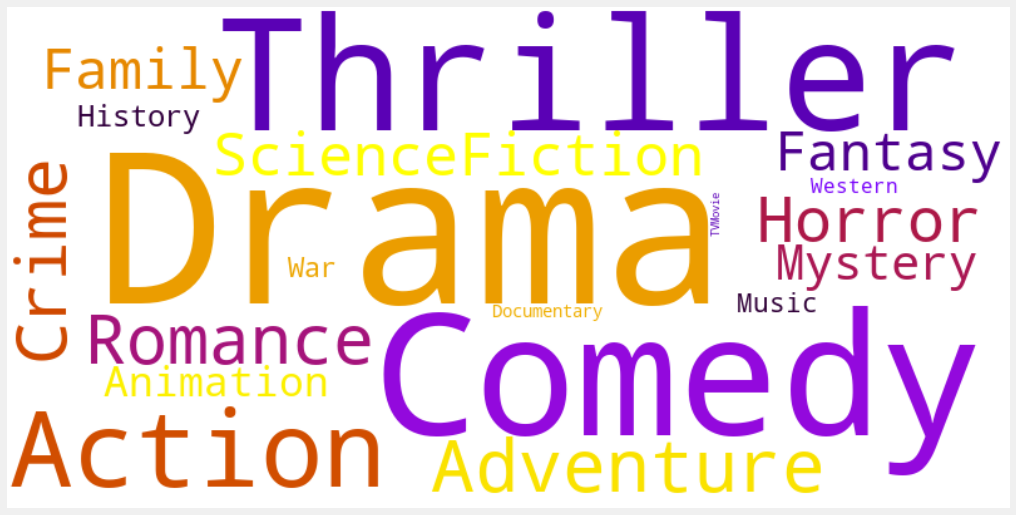

In [ ]:
from wordcloud import WordCloud

genres_cloud = WordCloud(width=800, height=400, background_color='white', colormap='gnuplot').generate_from_frequencies(all_genres)

plt.figure(figsize=(16,10))
plt.imshow(genres_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Di kolom cast hanya diambil data namenya saja

In [ ]:
movies_df['cast'] = movies_df['cast'].apply(lambda x: [i['name'] for i in eval(x)])
movies_df['cast'] = movies_df['cast'].apply(lambda x: ' '.join([i.replace(" ", "") for i in x]))

Dikolom keyword juga yang digunakan hanya data namenya saja

In [ ]:
movies_df['keywords'] = movies_df['keywords'].apply(lambda x: [i['name'] for i in eval(x)])
movies_df['keywords'] = movies_df['keywords'].apply(lambda x: ' '.join([i.replace(" ", "") for i in x]))

In [ ]:
movies_df.head()

,id,original_title,overview,release_date,runtime,keywords,cast,genre
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",1995-10-30,81.0,jealousy toy boy friendship friends rivalry bo...,TomHanks TimAllen DonRickles JimVarney Wallace...,"Animation, Comedy, Family"
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,1995-12-15,104.0,boardgame disappearance basedonchildren'sbook ...,RobinWilliams JonathanHyde KirstenDunst Bradle...,"Adventure, Fantasy, Family"
2,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,1995-02-10,106.0,baby midlifecrisis confidence aging daughter m...,SteveMartin DianeKeaton MartinShort KimberlyWi...,Comedy
3,949,Heat,"Obsessive master thief, Neil McCauley leads a ...",1995-12-15,170.0,robbery detective bank obsession chase shootin...,AlPacino RobertDeNiro ValKilmer JonVoight TomS...,"Action, Crime, Drama, Thriller"
4,11860,Sabrina,An ugly duckling having undergone a remarkable...,1995-12-15,127.0,paris brotherbrotherrelationship chauffeur lon...,HarrisonFord JuliaOrmond GregKinnear AngieDick...,"Comedy, Romance"


In [ ]:
movies_df['tags'] = movies_df['overview']+' '+movies_df['keywords']+' '+movies_df['cast']+' '+movies_df['genre']+' '+movies_df['original_title']

In [ ]:
movies_df['tags']

0       Led by Woody, Andy's toys live happily in his ...
1       When siblings Judy and Peter discover an encha...
2       Just when George Banks has recovered from his ...
3       Obsessive master thief, Neil McCauley leads a ...
4       An ugly duckling having undergone a remarkable...
                              ...                        
5776    While holidaying in the French Alps, a Swedish...
5777    Franky and Krimo dream of leaving the grey gri...
5778    Stuck in the corridors of time, Godefroy de Mo...
5779    A closeted boy runs the risk of being outed by...
5780    Hyperactive teenager Kelly is enrolled into a ...
Name: tags, Length: 5781, dtype: object

Mengahpus beberapa kolom yang sudah digunakan lagi

In [ ]:
movies_df.drop(['genre', 'keywords', 'cast', 'overview'], axis=1, inplace=True)

Mengubah type data di kolom runtime menjadi type data integer

In [ ]:
movies_df['runtime'] = movies_df['runtime'].astype("int")

In [ ]:
movies_df.head()

,id,original_title,release_date,runtime,tags
0,862,Toy Story,1995-10-30,81,"Led by Woody, Andy's toys live happily in his ..."
1,8844,Jumanji,1995-12-15,104,When siblings Judy and Peter discover an encha...
2,11862,Father of the Bride Part II,1995-02-10,106,Just when George Banks has recovered from his ...
3,949,Heat,1995-12-15,170,"Obsessive master thief, Neil McCauley leads a ..."
4,11860,Sabrina,1995-12-15,127,An ugly duckling having undergone a remarkable...


Mengecek apakah masih ada data yang null

In [ ]:
movies_df.isnull().sum()

id                 0
original_title     0
release_date       0
runtime            0
tags              12
dtype: int64

Menghapus data yang null du komlom tags

In [ ]:
movies_df.drop(movies_df[movies_df['tags'].isnull()].index, inplace=True)

In [ ]:
movies_df.shape

(5769, 5)

Menghapus duplikat data

In [ ]:
movies_df.drop_duplicates(inplace=True)

In [ ]:
movies_df.shape

(5693, 5)

# Model Development dengan Content Based Filtering

Import Library Tfidf yang akan digunakan

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

mengidenfikasi tfidf dengan maksimal feture 5000

In [ ]:
# Common words have less IDF
# Unique Words have high IDF
tfidf = TfidfVectorizer(max_features=5000)

In [ ]:
vectorized_data = tfidf.fit_transform(movies_df['tags'].values)

Menampilkan tfidf dari kolom tags

In [ ]:
tfidf.get_feature_names()

['000',
 '10',
 '11',
 '12',
 '13',
 '13th',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '1920s',
 '1930s',
 '1940s',
 '1950s',
 '1960s',
 '1970s',
 '1980s',
 '1990s',
 '19th',
 '19thcentury',
 '20',
 '20th',
 '24',
 '25',
 '30',
 '300',
 '3d',
 '40',
 '50',
 '50cent',
 'aaron',
 'aaroneckhart',
 'aarontaylor',
 'aasifmandvi',
 'abandoned',
 'abducted',
 'abigailbreslin',
 'abilities',
 'ability',
 'able',
 'aboard',
 'about',
 'above',
 'abuse',
 'abusive',
 'academy',
 'accepts',
 'accident',
 'accidentally',
 'accompanied',
 'account',
 'accountant',
 'accused',
 'across',
 'act',
 'action',
 'actions',
 'activist',
 'activities',
 'activity',
 'actor',
 'actress',
 'actually',
 'adam',
 'adambrody',
 'adamdriver',
 'adamgoldberg',
 'adamlefevre',
 'adams',
 'adamsandler',
 'adamscott',
 'adaptation',
 'addiction',
 'adewaleakinnuoye',
 'adolescence',
 'adopted',
 'adoption',
 'adrianmartinez',
 'adrienbrody',
 'adult',
 'adultanimation',
 'adultery',
 'adulthood',
 'adults',
 'adven

In [ ]:
vectorized_dataframe = pd.DataFrame(vectorized_data.toarray(), index=movies_df['tags'].index.tolist())

In [ ]:
vectorized_dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
vectorized_dataframe.shape

(5693, 5000)

Melakukan import SVD

In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
svd = TruncatedSVD(n_components=3000)

reduced_data = svd.fit_transform(vectorized_dataframe)

In [ ]:
reduced_data.shape

(5693, 3000)

In [ ]:
reduced_data

array([[ 0.13967568, -0.01557258,  0.0127673 , ..., -0.00456769,
         0.00610174, -0.00376419],
       [ 0.21360809, -0.03609794, -0.05045262, ...,  0.00717734,
         0.00362125,  0.00416193],
       [ 0.2477129 ,  0.04772957,  0.08304991, ..., -0.00586337,
        -0.006653  , -0.00374593],
       ...,
       [ 0.25740723, -0.08329857, -0.07535218, ...,  0.01479621,
         0.00110183,  0.01514204],
       [ 0.27988907, -0.00518125,  0.1164313 , ..., -0.00406979,
         0.00033044, -0.00755223],
       [ 0.19679089,  0.1673775 , -0.06513705, ...,  0.00450174,
        -0.00116318,  0.00477755]])

In [ ]:
svd.explained_variance_ratio_.cumsum()

array([0.00429954, 0.01101739, 0.0165922 , ..., 0.95277415, 0.95283244,
       0.95289057])

Melakukan import library cosine

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

Menghitung derajat kesamaan yang mirip

In [ ]:
similarity = cosine_similarity(reduced_data)

In [ ]:
similarity

array([[1.        , 0.0406899 , 0.03261471, ..., 0.04720346, 0.12328778,
        0.0342825 ],
       [0.0406899 , 1.        , 0.03903063, ..., 0.05193432, 0.01965374,
        0.03505965],
       [0.03261471, 0.03903063, 1.        , ..., 0.05619069, 0.07130095,
        0.04909337],
       ...,
       [0.04720346, 0.05193432, 0.05619069, ..., 1.        , 0.08225456,
        0.02693524],
       [0.12328778, 0.01965374, 0.07130095, ..., 0.08225456, 1.        ,
        0.07209148],
       [0.0342825 , 0.03505965, 0.04909337, ..., 0.02693524, 0.07209148,
        1.        ]])

Membuat fungsi untuk melakukan rekomendasi berdasarkan original tittle

In [ ]:
def recomendation_system(movie):
    id_of_movie = movies_df[movies_df['original_title']==movie].index[0]
    distances = similarity[id_of_movie]
    movie_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x:x[1])[1:20]
    for movie_id in movie_list:
        print(movies_df.iloc[movie_id[0]].original_title + " (" + movies_df.iloc[movie_id[0]].release_date + ")" +
              " : " + str(movies_df.iloc[movie_id[0]].runtime) + " Menit")

Menampilkan hasil rekomendasi

In [ ]:
recomendation_system('The Matrix')

The Matrix Revolutions (2003-11-05) : 129 Menit
The Matrix Reloaded (2003-05-15) : 138 Menit
The Animatrix (2003-05-09) : 102 Menit
Commando (1985-10-03) : 90 Menit
GHOST IN THE SHELL (1995-11-18) : 83 Menit
Terminator 3: Rise of the Machines (2003-07-02) : 109 Menit
Hackers (1995-09-14) : 107 Menit
Tron (1982-07-09) : 96 Menit
Who Am I - Kein System ist sicher (2014-09-25) : 105 Menit
The Zero Theorem (2014-01-02) : 107 Menit
サマーウォーズ (2009-08-01) : 114 Menit
Pompeii (2014-02-18) : 105 Menit
Æon Flux (2005-11-30) : 93 Menit
Terminator Salvation (2009-05-20) : 115 Menit
Strange Days (1995-10-13) : 145 Menit
2001: A Space Odyssey (1968-04-10) : 149 Menit
攻殻機動隊 2.0 (2008-07-12) : 85 Menit
The Colony (2013-04-12) : 95 Menit
アップルシード (2004-04-17) : 101 Menit


In [ ]:
recomendation_system('Jumanji')

Geri's Game (1997-11-24) : 4 Menit
Wreck-It Ralph (2012-11-01) : 108 Menit
Alan Partridge: Alpha Papa (2013-07-24) : 90 Menit
Stay Alive (2006-03-24) : 100 Menit
Dungeons & Dragons (2000-12-08) : 107 Menit
Indie Game: The Movie (2012-05-18) : 96 Menit
Nerve (2016-07-27) : 96 Menit
Panic Room (2002-03-29) : 111 Menit
Where the Wild Things Are (2009-10-16) : 101 Menit
Jack the Giant Slayer (2013-02-27) : 114 Menit
The Smurfs 2 (2013-07-30) : 105 Menit
Fantastic Beasts and Where to Find Them (2016-11-16) : 133 Menit
The Lorax (2012-03-01) : 86 Menit
Zathura: A Space Adventure (2005-11-06) : 101 Menit
The Last Starfighter (1984-07-13) : 101 Menit
Knights of Badassdom (2013-01-21) : 86 Menit
The Running Man (1987-11-13) : 101 Menit
The Descent (2005-07-08) : 99 Menit
James and the Giant Peach (1996-04-12) : 79 Menit


# Model Development dengan Collaborative Filtering

Import library yang dibutuhkan

In [ ]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
# from surprise.model_selection import KFold
reader = Reader()

data = Dataset.load_from_df(rating[['userId', 'movieId', 'rating']], reader)
# kf = KFold(n_splits=5)
# kf.split(data)

Menampilkan hasil persamaan yang mirip dengan matrik RMSE dan MAE

In [ ]:
Svd = SVD()
cross_validate(Svd, data, measures=['RMSE', 'MAE'], cv=5)

{'test_rmse': array([0.79592337, 0.79580482, 0.79638364, 0.79607742, 0.79646898]),
 'test_mae': array([0.60202421, 0.60205324, 0.60237745, 0.60208224, 0.60236943]),
 'fit_time': (1105.1874415874481,
  1211.0096752643585,
  1130.2293117046356,
  925.8258974552155,
  922.4190316200256),
 'test_time': (100.8700098991394,
  81.1241545677185,
  73.2940309047699,
  73.67203617095947,
  58.85498881340027)}

Melakukan pemodelan menggunakan data train

In [ ]:
trainset = data.build_full_trainset()
Svd.fit(trainset)

Menampilkan hasil dengan user ID 1

In [ ]:
rating[rating['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556
5,1,1968,4.0,1425942148
6,1,2762,4.5,1425941300
7,1,2918,5.0,1425941593
8,1,2959,4.0,1425941601
9,1,4226,4.0,1425942228


Menampilkan contoh dari user Id 1 dan Id movie 302

In [ ]:
Svd.predict(1, 302, 3)

Prediction(uid=1, iid=302, r_ui=3, est=4.128843645453536, details={'was_impossible': False})